# <center> **COMMENT IMPORTER DES DONNEES FINANCIERES DANS R ?**

Par [Josué AFOUDA](https://afouda-datascience.com/)

# <font color=red> Importation des données financières à partir de fichiers textes

In [1]:
# Importation des librairies 'zoo' et 'xts'

library(zoo)

library(xts)


Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric

Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 


In [2]:
# Importation des données du fichier '^GSPC.csv' en tant qu'objet zoo

sp500_zoo <- read.zoo('^GSPC.csv', sep=",", header=TRUE)

# Affichage des premières observations

head(sp500_zoo, 3)

              Open    High     Low   Close Adj.Close     Volume
2000-01-03 1469.25 1478.00 1438.36 1455.22   1455.22  931800000
2000-01-04 1455.22 1455.22 1397.43 1399.42   1399.42 1009000000
2000-01-05 1399.42 1413.27 1377.68 1402.11   1402.11 1085500000

In [3]:
# Conversion en objet xts

sp500_xts <- as.xts(sp500_zoo)

# Affichage des premières observations

head(sp500_xts)

              Open    High     Low   Close Adj.Close     Volume
2000-01-03 1469.25 1478.00 1438.36 1455.22   1455.22  931800000
2000-01-04 1455.22 1455.22 1397.43 1399.42   1399.42 1009000000
2000-01-05 1399.42 1413.27 1377.68 1402.11   1402.11 1085500000
2000-01-06 1402.11 1411.90 1392.10 1403.45   1403.45 1092300000
2000-01-07 1403.45 1441.47 1400.73 1441.47   1441.47 1225200000
2000-01-10 1441.47 1464.36 1441.47 1457.60   1457.60 1064800000

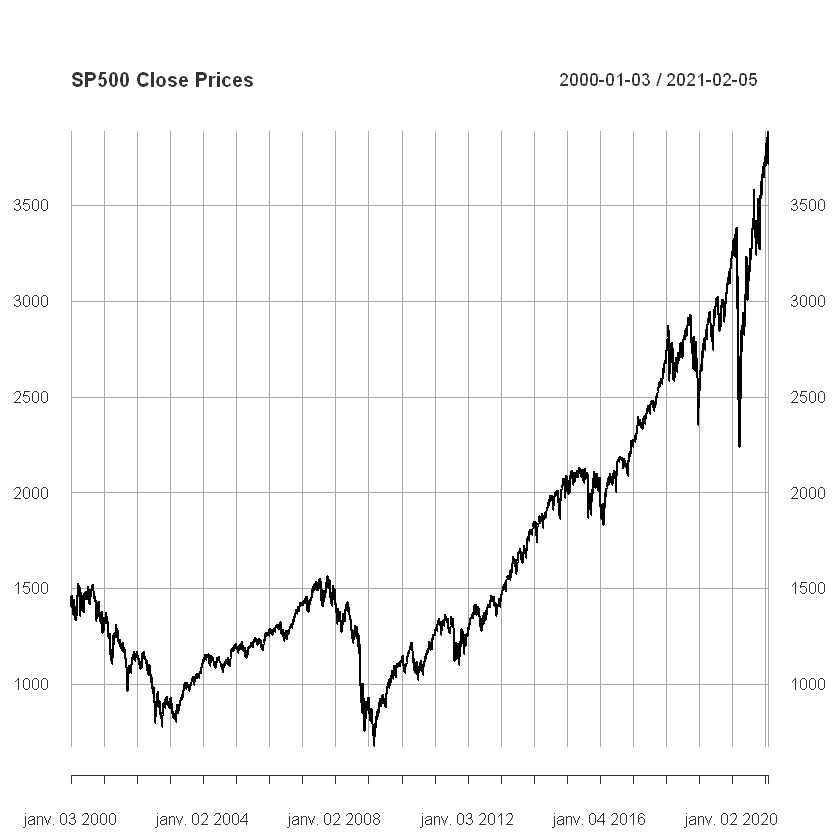

In [4]:
# Graphique d'évolution des prix de clôture du S&P500

plot(sp500_xts$Close, main = "SP500 Close Prices")

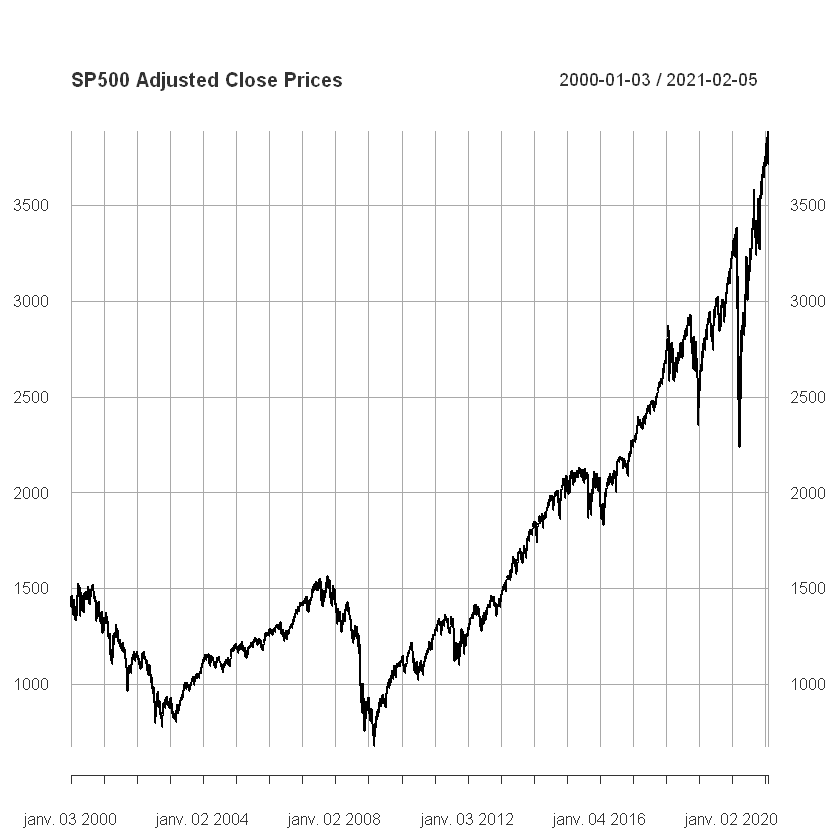

In [5]:
# Graphique d'évolution des prix ajustés de clôture du S&P500

plot(sp500_xts$Adj.Close, main = "SP500 Adjusted Close Prices")

# <font color=red> Fonction Quandl() de la librairie Quandl

In [ ]:
# Installation de la librairie Quandl

#install.packages("Quandl")

In [6]:
# Importation de la librairie Quandl

library(Quandl)

Warning message:
"package 'Quandl' was built under R version 3.6.3"

In [ ]:
# Aide sur la fonction Quandl()

?Quandl

Au-delà de 50 appels/jour de la fonction Quandl(), vous devez spécifier votre clé API. Pour avoir une clé API de Quandl, vous devez créer un compte sur https://www.quandl.com/

In [7]:
# Ma clé API

Quandl.api_key("7jthmmLEd2yYWJU_tjf1")

# Importation des données sur le PIB américain

gdp_df <- Quandl(code = "FRED/GDP")

# Affichage des premières observations

head(gdp_df, 3)

Date,Value
2020-10-01,21479.53
2020-07-01,21170.25
2020-04-01,19520.11


In [8]:
# Type de gdp_df

class(gdp_df)

[1] "data.frame"

In [9]:
# Vous pouvez spécifier le type d'objet renvoyé par la fonction Quandl

gdp_xts <- Quandl(code = "FRED/GDP", type = "xts")

# Structure de gdp_xts

str(gdp_xts)

An 'xts' object on 1947 Q1/2020 Q4 containing:
  Data: num [1:296, 1] 243 246 250 260 266 ...
  Indexed by objects of class: [yearqtr] TZ: UTC
  xts Attributes:  
 NULL


In [10]:
# Type ts

gdp_ts <- Quandl(code = "FRED/GDP", type = "ts")

# Structure de gdp_ts

str(gdp_ts)

 Time-Series [1:296] from 1947 to 2021: 243 246 250 260 266 ...


Pour trouver le symbole du d'une action ou d'un indice de marché, vous pouvez chercher sur [Yahoo Finance](https://fr.finance.yahoo.com/).

In [12]:
# Importation des données sur une période précise

oil_ts <- Quandl(code = "NSE/OIL", type = "ts", start_date = "2015-01-01", end_date = "2016-12-31")

# Structure de l'objet oil_ts

str(oil_ts)

Warning message in Quandl(code = "NSE/OIL", type = "ts", start_date = "2015-01-01", :
"Type 'ts' does not support frequency 365. Returning zoo."

'zoo' series from 2015-01-01 to 2016-12-30
  Data: num [1:495, 1:7] 572 580 575 560 536 ...
 - attr(*, "dimnames")=List of 2
  ..$ : NULL
  ..$ : chr [1:7] "Open" "High" "Low" "Last" ...
  Index:  Date[1:495], format: "2015-01-01" "2015-01-02" "2015-01-05" "2015-01-06" "2015-01-07" ...


# <font color=red> Fonction getSymbols() de la librairie quantmod

In [ ]:
# installation de la librairie quantmod
#install.packages("quantmod")

In [13]:
# Importation  de la librairie quantmod

library(quantmod)

Warning message:
"package 'quantmod' was built under R version 3.6.3"Loading required package: TTR
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 


In [ ]:
# Aide sur la fonction getSymbols()

?getSymbols

In [14]:
# Importation des informations boursières d'Apple. getSymbols(Symbols = "AAPL", src = "yahoo") 

getSymbols("AAPL") 

'getSymbols' currently uses auto.assign=TRUE by default, but will
use auto.assign=FALSE in 0.5-0. You will still be able to use
'loadSymbols' to automatically load data. getOption("getSymbols.env")
and getOption("getSymbols.auto.assign") will still be checked for
alternate defaults.

This message is shown once per session and may be disabled by setting 
options("getSymbols.warning4.0"=FALSE). See ?getSymbols for details.



[1] "AAPL"

Par défaut, l'argument ***auto.assign = TRUE*** ce qui signifie que les données sont chargées directement dans l'espace de travail. 

In [15]:
# Affichage des premières observations

head(AAPL, 3)

           AAPL.Open AAPL.High AAPL.Low AAPL.Close AAPL.Volume AAPL.Adjusted
2007-01-03  3.081786  3.092143 2.925000   2.992857  1238319600      2.577937
2007-01-04  3.001786  3.069643 2.993571   3.059286   847260400      2.635158
2007-01-05  3.063214  3.078571 3.014286   3.037500   834741600      2.616391

In [16]:
# Affichage des dernières observations

tail(AAPL, 3)

           AAPL.Open AAPL.High AAPL.Low AAPL.Close AAPL.Volume AAPL.Adjusted
2021-02-03    135.76    135.77   133.61     133.94    89880900      133.7402
2021-02-04    136.30    137.40   134.59     137.39    84183100      137.1850
2021-02-05    137.35    137.42   135.86     136.76    75524000      136.7600

In [17]:
 # Autre façon d'utiliser la fonction getSymbols

apple_df <- getSymbols("AAPL", auto.assign = FALSE)

# Affichage des premières observations

print(head(apple_df, 3))

# Affichage des dernières observations

print(tail(apple_df, 3))

           AAPL.Open AAPL.High AAPL.Low AAPL.Close AAPL.Volume AAPL.Adjusted
2007-01-03  3.081786  3.092143 2.925000   2.992857  1238319600      2.577937
2007-01-04  3.001786  3.069643 2.993571   3.059286   847260400      2.635158
2007-01-05  3.063214  3.078571 3.014286   3.037500   834741600      2.616391
           AAPL.Open AAPL.High AAPL.Low AAPL.Close AAPL.Volume AAPL.Adjusted
2021-02-03    135.76    135.77   133.61     133.94    89880900      133.7402
2021-02-04    136.30    137.40   134.59     137.39    84183100      137.1850
2021-02-05    137.35    137.42   135.86     136.76    75524000      136.7600


In [18]:
# Type d'objet renvoyé par la fonction getSymbols

class(apple_df)

[1] "xts" "zoo"

In [19]:
# Structure de apple_df

str(apple_df)

An 'xts' object on 2007-01-03/2021-02-05 containing:
  Data: num [1:3549, 1:6] 3.08 3 3.06 3.07 3.09 ...
 - attr(*, "dimnames")=List of 2
  ..$ : NULL
  ..$ : chr [1:6] "AAPL.Open" "AAPL.High" "AAPL.Low" "AAPL.Close" ...
  Indexed by objects of class: [Date] TZ: UTC
  xts Attributes:  
List of 2
 $ src    : chr "yahoo"
 $ updated: POSIXct[1:1], format: "2021-02-07 12:47:57"


In [20]:
# Importation des données sur une période précise

getSymbols("TSLA", from = as.Date("2011-01-01"), to = Sys.Date())

# Affichage des premières observations

print(head(TSLA, 3))

# Affichage des dernières observations

print(tail(TSLA, 3))

[1] "TSLA"

           TSLA.Open TSLA.High TSLA.Low TSLA.Close TSLA.Volume TSLA.Adjusted
2011-01-03     5.368      5.40    5.180      5.324     6415000         5.324
2011-01-04     5.332      5.39    5.204      5.334     5937000         5.334
2011-01-05     5.296      5.38    5.238      5.366     7233500         5.366
           TSLA.Open TSLA.High TSLA.Low TSLA.Close TSLA.Volume TSLA.Adjusted
2021-02-03    877.02    878.08   853.06     854.69    18343500        854.69
2021-02-04    855.00    856.50   833.42     849.99    15812700        849.99
2021-02-05    845.00    864.77   838.97     852.23    18524800        852.23


In [21]:
# Importation des données sur le PIB américain à partir de la FRED 

getSymbols("GDP", src = "FRED")

[1] "GDP"

In [22]:
# Affichage des premières observations

head(GDP, 3)

               GDP
1947-01-01 243.164
1947-04-01 245.968
1947-07-01 249.585

In [23]:
# Affichage des dernières observations

tail(GDP, 3)

                GDP
2020-04-01 19520.11
2020-07-01 21170.25
2020-10-01 21479.53

In [24]:
# Importation des données de plusieurs titres

stocks <- new.env()

stocks_names <- c("GOOG", "AMZN", "AAPL", "MSFT", "IBM")

getSymbols(stocks_names, env = stocks)

[1] "GOOG" "AMZN" "AAPL" "MSFT" "IBM"

In [25]:
# Google

head(stocks$GOOG, 3)

           GOOG.Open GOOG.High GOOG.Low GOOG.Close GOOG.Volume GOOG.Adjusted
2007-01-03  232.1299  237.4400 229.6940   232.9220    15470772      232.9220
2007-01-04  233.6243  241.0714 233.3005   240.7277    15834329      240.7277
2007-01-05  240.3491  242.8398 238.1623   242.6853    13795717      242.6853

In [26]:
# Amazon

head(stocks$AMZN, 3)

           AMZN.Open AMZN.High AMZN.Low AMZN.Close AMZN.Volume AMZN.Adjusted
2007-01-03     38.68     39.06    38.05      38.70    12405100         38.70
2007-01-04     38.59     39.14    38.26      38.90     6318400         38.90
2007-01-05     38.72     38.79    37.60      38.37     6619700         38.37

In [27]:
# Apple

head(stocks$AAPL, 3)

           AAPL.Open AAPL.High AAPL.Low AAPL.Close AAPL.Volume AAPL.Adjusted
2007-01-03  3.081786  3.092143 2.925000   2.992857  1238319600      2.577937
2007-01-04  3.001786  3.069643 2.993571   3.059286   847260400      2.635158
2007-01-05  3.063214  3.078571 3.014286   3.037500   834741600      2.616391

In [28]:
# Extraire les prix de clôture de chaque titre pour en former un seul ensemble de données xts

close_prices <- do.call(merge, lapply(stocks, Cl))

# Affichage des premières observations

head(close_prices, 5)

           AAPL.Close IBM.Close GOOG.Close AMZN.Close MSFT.Close
2007-01-03   2.992857     97.27   232.9220      38.70      29.86
2007-01-04   3.059286     98.31   240.7277      38.90      29.81
2007-01-05   3.037500     97.42   242.6853      38.37      29.64
2007-01-08   3.052500     98.90   240.8871      37.50      29.93
2007-01-09   3.306071    100.07   241.8435      37.78      29.96